In [48]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from plotting import *

In [51]:
dataDir = "."

In [52]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='LongRun-16-2hr'

In [53]:
M = 16

### If list of runs is empty, load all runs from [experimentName]

In [99]:
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
        if folder[:len(experimentName)]==experimentName:
            list_of_runs.append(folder)

### Load listed runs

In [57]:
loss_results, acc_results = load_list_of_runs(list_of_runs)

Loading run logs:
----------------
LongRun-16-2hr-0.001-0.3-True
LongRun-16-2hr-0.001-0.6-True
LongRun-16-2hr-0.005--0.3-False
LongRun-16-2hr-0.005-0.0-False


In [106]:
len(loss_results['LongRun-16-2hr-0.001-0.3-True'])

3680

## Enter batch time averages here

In [122]:
SYNC_SECONDS_PER_BATCH = 22.7771

ASYNC_SECONDS_PER_BATCH = 19.2253

## Overview of all smoothed curves 

In [123]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.01':'D'}
#marker_dict = {'0.0':'p', '0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [149]:
WINDOW = 800

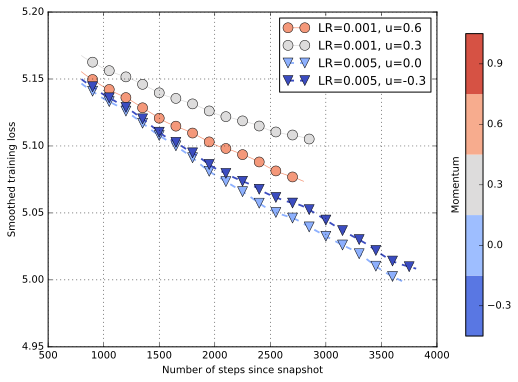

In [150]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=150)
                    #axis=[None, None, 5.15, 5.35])

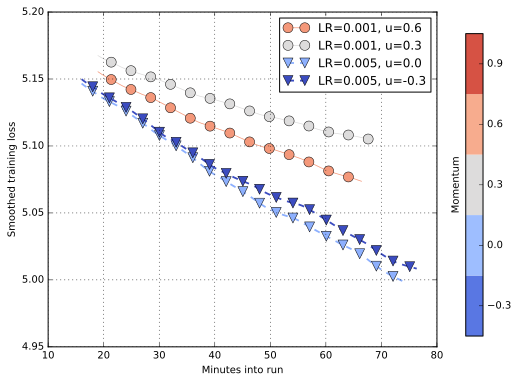

In [151]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=150,
                sync_seconds_per_batch=SYNC_SECONDS_PER_BATCH, async_seconds_per_batch=ASYNC_SECONDS_PER_BATCH, CG=M)
                    #axis=[None, None, 5.15, 5.35])

## [NOT ENOUGH 2hr POINTS FOR CONTOURS] Parameter space loss contours 

In [152]:
#plot_loss_contour(loss_results, window=WINDOW, sync=True)

In [153]:
#plot_loss_contour(loss_results, window=WINDOW, sync=False)

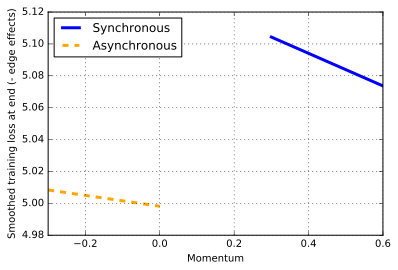

In [154]:
f=plot_momentum_dependence(loss_results, WINDOW)

## Plot winning curves along with evaluation loss level 

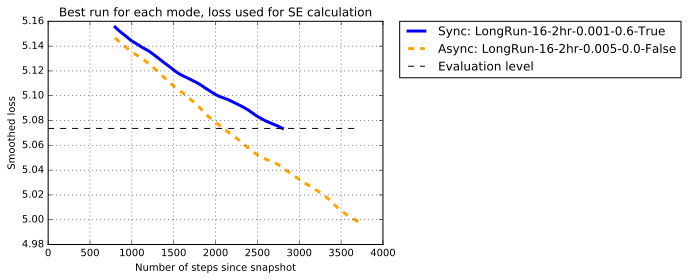

In [155]:
f=plot_se_calculation(loss_results, WINDOW)

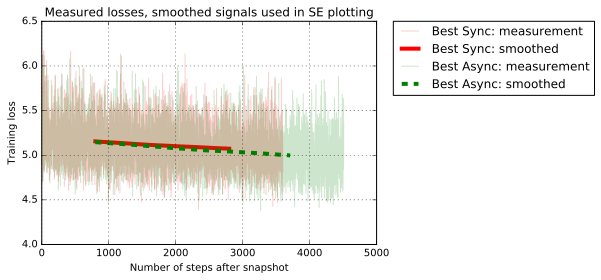

In [156]:
f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

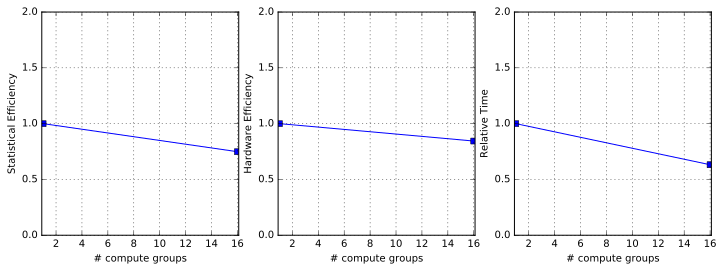

In [157]:
f = plot_se_he(loss_results, WINDOW, M, SYNC_SECONDS_PER_BATCH, ASYNC_SECONDS_PER_BATCH)

In [91]:
f.savefig('experiment4-long-se-he.png', bbox_inches='tight', pad_inches=0.1)

In [25]:
from IPython.display import HTML

if False:
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')